## Inteligență Artificială  Tema 1 - 2025: Sokoban

Responsabili:
- Andrei Olaru
- Cătălin Chiru
- Andrei Dugăeșescu
- Mihai Nan
- Vlad Matei Drăghici
- Alexandru Baciu
- Bogdan-Andrei Sprîncenatu

In [1]:
from sokoban import Map, save_images, create_gif
import time

# Creating a map 

In [2]:
# Maps can be created using the Map class
map_from_init = Map(5, 5, 0, 0, [('box1', 1, 3)], [(4, 4)], [(3,3), (3,4), (3,1)], 'easy_map1')

# Maps can be created through yaml files
map_from_yaml = Map.from_yaml('tests/easy_map1.yaml')

assert str(map_from_init) == str(map_from_yaml), "Reading from yaml file Failed"

In [3]:
# Maps can also be created from their string representation
map_str = str(map_from_init)
map_from_str = Map.from_str(map_str)

assert str(map_from_init) == str(map_from_str), "String conversion Failed"

# Solving a map 

In [4]:
map = Map.from_yaml('tests/easy_map1.yaml')

# Visualizing a map 

In [5]:
print(map)


_ _ _ _ X 
_ / _ / / 
_ _ _ _ _ 
_ _ _ B _ 
P _ _ _ _ 


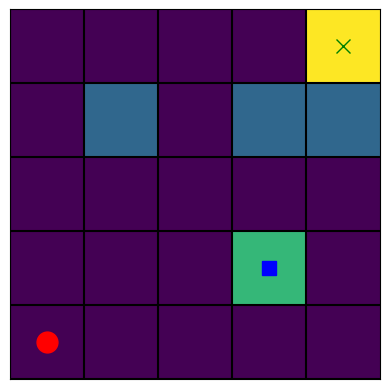

In [6]:
map.plot_map()

In [7]:
# To save the state of a map to disk:
# map.save_map('images', 'easy_map1_init.png')

In [8]:
import os
from search_methods.solver import Solver

directory_path = "tests"

maps = []
maps_name = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    maps.append(Map.from_yaml(file_path))
    maps_name.append(filename)
            
# map = Map.from_yaml('tests/medium_map1.yaml')
# solver = Solver(map)
# solver.solve(True)

i = 0
for map in maps:
    print("-----" + maps_name[i] + "-------")
    solver = Solver(map)
    solver.solve()
    i += 1


-----easy_map1.yaml-------
box1
(4, 4)
box1
(4, 4)
-------beam search-----
number of explored states is 29
number of undo moves is 1
-----easy_map2.yaml-------
box1
(4, 4)
box1
(4, 4)
-------beam search-----
number of explored states is 9
number of undo moves is 0
-----hard_map1.yaml-------
box1
(6, 5)
box2
(0, 4)
box3
(0, 1)
box4
(1, 0)
box1
(6, 5)
box2
(0, 4)
box3
(0, 1)
box4
(1, 0)
-------beam search-----
number of explored states is 340
number of undo moves is 61
-----hard_map2.yaml-------
box1
(7, 4)
box2
(0, 4)
box1
(7, 4)
box2
(0, 4)
-------beam search-----
number of explored states is 242
number of undo moves is 30
-----large_map1.yaml-------
box2
(5, 6)
box1
(6, 8)
box2
(5, 6)
box1
(6, 8)
-------beam search-----
-----large_map2.yaml-------
box1
(5, 4)
box3
(3, 8)
box2
(6, 10)
box1
(5, 4)
box3
(3, 8)
box2
(6, 10)
-------beam search-----
number of explored states is 2015
number of undo moves is 336
-----medium_map1.yaml-------
box1
(3, 4)
box2
(4, 4)
box1
(3, 4)
box2
(4, 4)
----